# Bike Sharing - Multiple Linear Regression


## Reading and Understanding the Data

In [5127]:
# Importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)
import sklearn
from sklearn.model_selection import train_test_split

#Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [5128]:
# Reading the dataset provides as a csv file
bike_share = pd.read_csv("day.csv")

In [5129]:
#checking the dataset
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5130]:
# Dropping all the irrelevant columns
bike_share.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis = 1, inplace = True)

In [5131]:
# checking the dataset again
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [5132]:
# Inspecting the dataset
bike_share.shape

(730, 11)

In [5133]:
#checking for any missing values in the dataset
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(8)
memory usage: 62.8 KB


- As can be seen that, there are no missing values in the dataframe and all the values are numeric.

In [5134]:
# Converting the data of categorical columns into string type
bike_share[['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']] = bike_share[['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']].astype('str')

In [5135]:
# Checking for numeric columns
bike_share.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


## Visualising the Data

In [5136]:
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

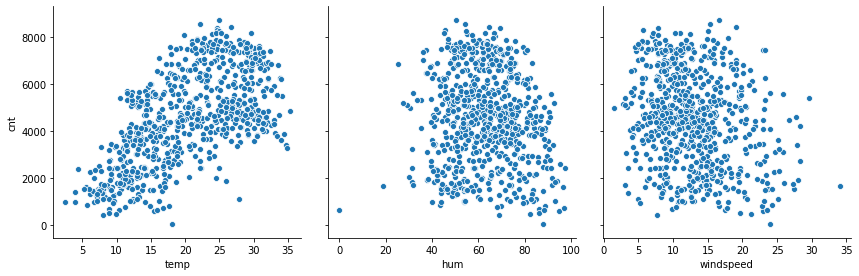

In [5137]:
# pair plots of various numerical independent variables versus target variable
sns.pairplot(bike_share, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=4, kind='scatter')
plt.show()

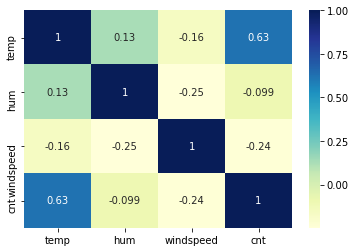

In [5138]:
sns.heatmap(bike_share.corr(), cmap="YlGnBu", annot = True)
plt.show()

- As can be seen from the pairplots and heatmap that the target variable 'cnt' is highly correlated to 'temp' vriable and it is very less correlated with 'hum' and 'windspeed'.

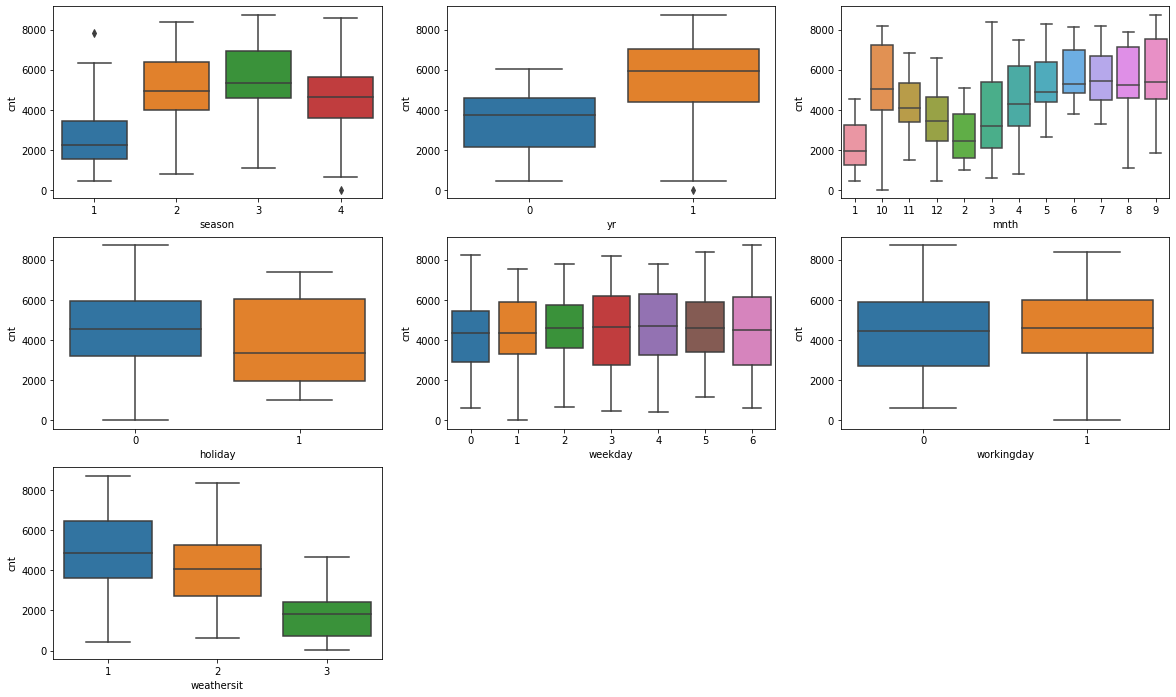

In [5139]:
# Creating boxplots for various categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_share)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share)
plt.show()

- As seen from above graphs that the target variables is affected or correlated with these categorical variables. For example, as the year changes from 0 to 1 (i.e. 2018 to 2019), the target variable increases positively. Similarly, the target variable is highly dependent on weather conditions and season.

## Data Preparation

In [5140]:
# Checking the dataset
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [5141]:
# converting the binary variables into integers so it can be fed to model
# List of variables to map
varlist =  ['holiday', 'yr', 'workingday']

# Defining the map function
def binary_map(x):
    return x.map({'1': 1, "0": 0})

# Applying the function to the housing list
bike_share[varlist] = bike_share[varlist].apply(binary_map)


In [5142]:
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [5143]:
# Replacing the categorical columns values with their respective categories to creare dummy variables
bike_share["season"].replace({"1": "spring", "2": "summer", "3":"fall", "4": "winter"}, inplace=True)
bike_share["mnth"].replace({"1": "Jan", "2": "Feb", "3":"March", "4": "April", "5": "May", "6": "June", "7": "July", "8": "Aug", "9": "Sep", "10": "Oct", "11": "Nov", "12": "Dec"}, inplace=True)
bike_share["weekday"].replace({"0":"Sunday", "1": "Monday", "2": "Tuesday", "3":"Wednesday", "4": "Thrusday", "5": "Friday", "6":"Saturday"}, inplace=True)
bike_share["weathersit"].replace({"1": "Clear", "2": "Mist+Cloundy", "3":"Light Snow rain", "4": "Heavy Snow rain"}, inplace=True)

In [5144]:
#checking the dataframe after conversions
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist+Cloundy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist+Cloundy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


## Dummy variables Creation

In [5145]:
# creating dummy variables for 'seasons'
season = pd.get_dummies(bike_share['season'])
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [5146]:
# dropping the winter column

season.drop('winter', axis = 1, inplace = True)
season.head()

,fall,spring,summer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [5147]:
# Add the results to the original bike_share dataframe

bike_share = pd.concat([bike_share, season], axis = 1)
bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,fall,spring,summer
0,spring,0,Jan,0,Saturday,0,Mist+Cloundy,14.110847,80.5833,10.749882,985,0,1,0
1,spring,0,Jan,0,Sunday,0,Mist+Cloundy,14.902598,69.6087,16.652113,801,0,1,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,0,1,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,0,1,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,0,1,0


In [5148]:
# Droping 'season' column as we have created the dummies for it

bike_share.drop(['season'], axis = 1, inplace = True)

In [5149]:
bike_share.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,fall,spring,summer
0,0,Jan,0,Saturday,0,Mist+Cloundy,14.110847,80.5833,10.749882,985,0,1,0
1,0,Jan,0,Sunday,0,Mist+Cloundy,14.902598,69.6087,16.652113,801,0,1,0
2,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,0,1,0
3,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,0,1,0
4,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,0,1,0


In [5150]:
# creating dummy variables for 'weekday'
weekday = pd.get_dummies(bike_share['weekday'])
weekday.head()

,Friday,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [5151]:
# dropping the first column from weekday using 'drop_first = True'

weekday = pd.get_dummies(bike_share['weekday'], drop_first = True)
weekday.head()

,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [5152]:
# Add the results to the original bike_share dataframe

bike_share = pd.concat([bike_share, weekday], axis = 1)
bike_share.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,Jan,0,Saturday,0,Mist+Cloundy,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0
1,0,Jan,0,Sunday,0,Mist+Cloundy,14.902598,69.6087,16.652113,801,0,1,0,0,0,1,0,0,0
2,0,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0
3,0,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0
4,0,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1


In [5153]:
# Droping 'weekday' column as we have created the dummies for it

bike_share.drop(['weekday'], axis = 1, inplace = True)
bike_share.head()

,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,0,Jan,0,0,Mist+Cloundy,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0
1,0,Jan,0,0,Mist+Cloundy,14.902598,69.6087,16.652113,801,0,1,0,0,0,1,0,0,0
2,0,Jan,0,1,Clear,8.050924,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0
3,0,Jan,0,1,Clear,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0
4,0,Jan,0,1,Clear,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1


In [5154]:
# creating dummy variables for 'weathersit'
weathersit = pd.get_dummies(bike_share['weathersit'])
weathersit.head()

,Clear,Light Snow rain,Mist+Cloundy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [5155]:
# dropping the first column from weathersit using 'drop_first = True'

weathersit = pd.get_dummies(bike_share['weathersit'], drop_first = True)
weathersit.head()

,Light Snow rain,Mist+Cloundy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [5156]:
# Add the results to the original bike_share dataframe

bike_share = pd.concat([bike_share, weathersit], axis = 1)
bike_share.head()

,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow rain,Mist+Cloundy
0,0,Jan,0,0,Mist+Cloundy,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0,0,1
1,0,Jan,0,0,Mist+Cloundy,14.902598,69.6087,16.652113,801,0,1,0,0,0,1,0,0,0,0,1
2,0,Jan,0,1,Clear,8.050924,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0,0,0
3,0,Jan,0,1,Clear,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0,0,0
4,0,Jan,0,1,Clear,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0


In [5157]:
# Drop 'weathersit' column as we have created the dummies for it

bike_share.drop(['weathersit'], axis = 1, inplace = True)
bike_share.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow rain,Mist+Cloundy
0,0,Jan,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0,0,1
1,0,Jan,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,0,1,0,0,0,0,1
2,0,Jan,0,1,8.050924,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0,0,0
3,0,Jan,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0,0,0
4,0,Jan,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0


In [5158]:
# creating dummy variables for column 'mnth'
mnth = pd.get_dummies(bike_share['mnth'])
mnth.head()

,April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [5159]:
# dropping the first column from mnth using 'drop_first = True'

mnth = pd.get_dummies(bike_share['mnth'], drop_first = True)
mnth.head()

,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [5160]:
# Add the results to the original bike_share dataframe

bike_share = pd.concat([bike_share, mnth], axis = 1)
bike_share.head()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow rain,Mist+Cloundy,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,Jan,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,8.050924,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [5161]:
# Drop 'mnth' column as we have created the dummies for it

bike_share.drop(['mnth'], axis = 1, inplace = True)
bike_share.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow rain,Mist+Cloundy,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [5162]:
# Splitting the data into test and train data
np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


### Rescaling the Features 

In [5163]:
# Using Min-Max Scaling and importing min-max scaler from sklearn
from sklearn.preprocessing import MinMaxScaler

In [5164]:
#Instantiating an object
scaler = MinMaxScaler()

In [5165]:
# Apply scaler() to all the columns except the columns with integer values (1 & 0) and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow rain,Mist+Cloundy,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5166]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light Snow rain,Mist+Cloundy,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.262745,0.243137,0.245098,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.440557,0.429398,0.430568,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- As seen from above, the numeric variables are now scaled between 0 and 1.

## Building the Model

In [5167]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

In [5168]:
# Importing RFE and LinearRegression from sklearn library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [5169]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [5170]:
# Ranking of various variables by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thrusday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Light Snow rain', True, 1),
 ('Mist+Cloundy', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('March', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1)]

In [5171]:
# Top 15 variables as selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'summer', 'Saturday', 'Light Snow rain', 'Mist+Cloundy',
       'Jan', 'July', 'Sep'],
      dtype='object')

### Building model using statsmodel (Manual Selection of Variables)

In [5172]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [5173]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [5174]:
# Running the linear model
lm_1 = sm.OLS(y_train,X_train_rfe).fit()   

In [5175]:
#Summary of linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          2.31e-191
Time:                        21:52:08   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3455      0.031     

### Checking VIF 

In [5176]:
# Importing VIF from statsmodel library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5177]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [5178]:
# Checking for multicollinearity between various independent variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,23.78
4,hum,19.25
2,workingday,5.18
6,fall,5.04
5,windspeed,4.35
7,spring,2.63
8,summer,2.49
11,Mist+Cloundy,2.16
0,yr,2.06
9,Saturday,1.93


- As seen from above model with 15 variables, the value of R square is close to 0.85 which is a significantly good indication towards linear regression model building.
- Also, all the indipendent variables have a p-value < 0.05, but few of the variables have a very high VIF which is an indication of multi-collinearity.
- So, removing 'temp' variable as it has a very high VIF of 23.78.

In [5179]:
# Dropping column 'temp' as it has a very high VIF of 23.78
X_train_new = X_train_rfe.drop(['temp'], axis=1)

In [5180]:
# Running the model again after removing 'temp'
X_train_new = sm.add_constant(X_train_new) #adding constant
lm_2 = sm.OLS(y_train,X_train_new).fit()

In [5181]:
#Summary of linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     126.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          4.67e-153
Time:                        21:52:08   Log-Likelihood:                 425.75
No. Observations:                 510   AIC:                            -821.5
Df Residuals:                     495   BIC:                            -758.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4773      0.035     

In [5182]:
# Checking for multicollinearity between various independent variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

X_train_new = X_train_new.drop(['const'], axis=1) #dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,9.67
2,workingday,5.08
4,windspeed,4.25
5,fall,2.75
6,spring,2.59
7,summer,2.00
0,yr,1.98
10,Mist+Cloundy,1.94
8,Saturday,1.91
11,Jan,1.60


- Now, removing the 'hum' variable as it has a very high p-value of 0.808 as well as high VIF factor.

In [5183]:
# Dropping column 'hum'
X_train_new = X_train_new.drop(['hum'], axis=1)

In [5184]:
# Running the model again after removing 'hum'
X_train_new = sm.add_constant(X_train_new) #adding constant
lm_3 = sm.OLS(y_train,X_train_new).fit()

In [5185]:
#Summary of new linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          4.04e-154
Time:                        21:52:08   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4699      0.018     

In [5186]:
# Checking for multicollinearity between various independent variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

X_train_new = X_train_new.drop(['const'], axis=1) #dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.95
2,workingday,3.73
4,fall,2.60
5,spring,2.55
0,yr,1.91
6,summer,1.90
7,Saturday,1.63
10,Jan,1.60
11,July,1.56
9,Mist+Cloundy,1.53


- In this Model, all the independent variables has low VIF which are less than 5, but 'July' has a p-value of 0.645 which is very high, hence removing this variable.

In [5187]:
# Dropping column 'July' as it has a very high p-value of 0.645
X_train_new = X_train_new.drop(['July'], axis=1)

In [5188]:
# Running the model again after removing 'July'
X_train_new = sm.add_constant(X_train_new) #adding constant
lm_4 = sm.OLS(y_train,X_train_new).fit()

In [5189]:
#Summary of new linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          3.62e-155
Time:                        21:52:08   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4694      0.018     

In [5190]:
# Checking for multicollinearity between various independent variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

X_train_new = X_train_new.drop(['const'], axis=1) #dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.94
2,workingday,3.73
5,spring,2.55
4,fall,1.94
0,yr,1.91
6,summer,1.90
7,Saturday,1.63
10,Jan,1.60
9,Mist+Cloundy,1.52
11,Sep,1.27


- In this model, the VIF of all the independent variables is less than 5, but the p-value of holiday is 0.079 which is significantly high and hence removing this variable.

In [5191]:
# Dropping column 'holiday' as it has a very high p-value of 0.079
X_train_new = X_train_new.drop(['holiday'], axis=1)

In [5192]:
# Running the model again after removing 'holiday'
X_train_new = sm.add_constant(X_train_new) #adding constant
lm_5 = sm.OLS(y_train,X_train_new).fit()

In [5193]:
#Summary of new linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.30e-155
Time:                        21:52:09   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4606      0.017     

In [5194]:
# Checking for multicollinearity between various independent variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

X_train_new = X_train_new.drop(['const'], axis=1) #dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.82
1,workingday,3.53
4,spring,2.54
3,fall,1.93
0,yr,1.90
5,summer,1.90
9,Jan,1.60
6,Saturday,1.58
8,Mist+Cloundy,1.52
10,Sep,1.26


- In this model all the columns have VIF less than 5 and p-value less than 0.05. In order to make a final model with 10 variables, we will drop the least significant variable in this model which is 'summer'.

In [5195]:
# Dropping column 'summer' 
X_train_new = X_train_new.drop(['summer'], axis=1)

In [5196]:
# Running the model again after removing 'summer'
X_train_new = sm.add_constant(X_train_new) #adding constant
lm_6 = sm.OLS(y_train,X_train_new).fit()

In [5197]:
#Summary of new linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     173.9
Date:                Sun, 13 Sep 2020   Prob (F-statistic):          1.48e-155
Time:                        21:52:16   Log-Likelihood:                 421.21
No. Observations:                 510   AIC:                            -820.4
Df Residuals:                     499   BIC:                            -773.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4723      0.017     

In [5198]:
# Checking for multicollinearity between various independent variables
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs

X_train_new = X_train_new.drop(['const'], axis=1) #dropping constant
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.40
1,workingday,3.24
4,spring,2.10
0,yr,1.89
3,fall,1.62
8,Jan,1.60
5,Saturday,1.54
7,Mist+Cloundy,1.52
9,Sep,1.25
6,Light Snow rain,1.07


- Now, since all the variables have p-value almost equal to zero and their VIF is less 5 which shows that these variables are significant to the models and multi-collinearity is minimal. Hence, the final model has these 10 independent variable.

### Final Model with 10 independent variables and a constant

In [5199]:
#adding constant in the final model
X_train_new_1 = sm.add_constant(X_train_new)
X_train_new_1.head()

,const,yr,workingday,windspeed,fall,spring,Saturday,Light Snow rain,Mist+Cloundy,Jan,Sep
653,1.0,1,1,0.300794,0,0,0,0,0,0,0
576,1.0,1,1,0.264686,1,0,0,0,0,0,0
426,1.0,1,0,0.255342,0,1,1,0,1,0,0
728,1.0,1,0,0.663106,0,1,0,0,0,0,0
482,1.0,1,0,0.188475,0,0,1,0,1,0,0


## Residual Analysis

In [5200]:
y_train_pred = lm_6.predict(X_train_new_1)

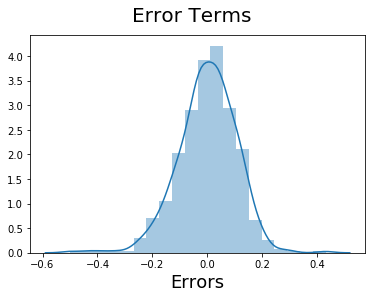

In [5201]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

- As seen from the above graph that the error terms are normally distributed, hence the important assumption of linear regression holds true.

## Predictions from the Model

In [5202]:
# Apply scaler() to all the columns except the columns with values (1 & 0) and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


In [5203]:
# Creating target variable and the independent variables from the test dataset
y_test = df_test.pop('cnt')
X_test = df_test

In [5204]:
# Selecting variables predicted by model

X_test_new = X_test[X_train_new.columns]
X_test_new.head()

,yr,workingday,windspeed,fall,spring,Saturday,Light Snow rain,Mist+Cloundy,Jan,Sep
184,0,0,0.084219,1,0,0,0,1,0,0
535,1,1,0.153728,0,0,0,0,0,0,0
299,0,1,0.334206,0,0,0,0,1,0,0
221,0,1,0.339570,1,0,0,0,0,0,0
152,0,1,0.537414,0,0,0,0,0,0,0


In [5205]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,yr,workingday,windspeed,fall,spring,Saturday,Light Snow rain,Mist+Cloundy,Jan,Sep
184,1.0,0,0,0.084219,1,0,0,0,1,0,0
535,1.0,1,1,0.153728,0,0,0,0,0,0,0
299,1.0,0,1,0.334206,0,0,0,0,1,0,0
221,1.0,0,1,0.339570,1,0,0,0,0,0,0
152,1.0,0,1,0.537414,0,0,0,0,0,0,0


In [5206]:
# Making predictions on the test dataset
y_pred = lm_6.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

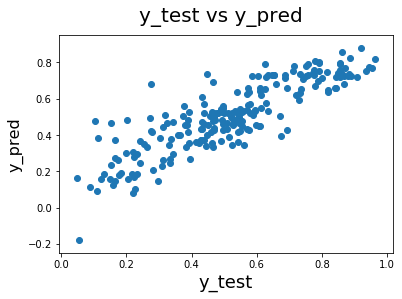

In [5207]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)      

In [5208]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7372567543641199

- The value of R square (train) is 0.77 while the value of R square (test) is 0.737 which are very close to each other and within five percent difference level. This shows that the model has performed well on the training set as also generalized well on the test set.

### The equation of best fitted line is:



 $ cnt = 0.4723 + 0.2483 \times yr + 0.0587 \times workingday - 0.1795 \times windspeed + 0.0580 \times fall - 0.2021 \times spring + 0.0659 \times Saturday - 0.3106 \times Light Snow Rain - 0.0887 \times MistCloudy - 0.1026 \times Jan + 0.0675 \times Sep   $